Author: Nicolas Saenz
Customer Segmentation model

In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

import plotly.express as px
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import LabelEncoder

In [15]:
#make datasets uniform with lowercase function
def lowercase(val):
    if isinstance(val, str):
        return val.lower()
    return val

In [17]:
#contains city observation data by month

df_tes = pd.read_csv('Test.csv')

df_tes = df_tes.map(lowercase)

df_tra = pd.read_csv('Train.csv')

df_tra = df_tra.map(lowercase)

print(df_tes.head(24))

print(df_tra.head(24))


#df_city_month = df_city_month.drop(columns=[])


        ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0   458989  female          yes   36       yes    engineer              0.0   
1   458994    male          yes   37       yes  healthcare              8.0   
2   458996  female          yes   69        no         NaN              0.0   
3   459000    male          yes   59        no   executive             11.0   
4   459001  female           no   19        no   marketing              NaN   
5   459003    male          yes   47       yes      doctor              0.0   
6   459005    male          yes   61       yes      doctor              5.0   
7   459008  female          yes   47       yes      artist              1.0   
8   459013    male          yes   50       yes      artist              2.0   
9   459014    male           no   19        no  healthcare              0.0   
10  459015    male           no   22        no  healthcare              0.0   
11  459016  female           no   22        no  heal

In [19]:
#Count rows that have AT LEAST one NaN
row_tes_nan = df_tes.isnull().any(axis=1).sum()

print(f"Number of rows with at least one NaN: {row_tes_nan}")

row_tra_nan = df_tra.isnull().any(axis=1).sum()

print(f"Number of rows with at least one NaN: {row_tra_nan}")

Number of rows with at least one NaN: 473
Number of rows with at least one NaN: 1403


In [21]:
# Impute median
imputer = SimpleImputer(strategy='median')


In [23]:

#Impute test data set

df_tes['Age'] = imputer.fit_transform(df_tes[['Age']])

df_tes['Work_Experience'] = imputer.fit_transform(df_tes[['Work_Experience']])

df_tes['Family_Size'] = imputer.fit_transform(df_tes[['Family_Size']])



#Impute train data set

df_tra['Age'] = imputer.fit_transform(df_tra[['Age']])

df_tra['Work_Experience'] = imputer.fit_transform(df_tra[['Work_Experience']])

df_tra['Family_Size'] = imputer.fit_transform(df_tra[['Family_Size']])

In [25]:
#Count rows that have AT LEAST one NaN
row_tes_nan = df_tes.isnull().any(axis=1).sum()

print(f"Number of rows with at least one NaN: {row_tes_nan}")

total_rows_test = len(df_tes)

print(f"Total rows: {total_rows_test}")

row_tra_nan = df_tra.isnull().any(axis=1).sum()

print(f"Number of rows with at least one NaN: {row_tra_nan}")

total_rows_train = len(df_tra)

print(f"Total rows: {total_rows_train}")

Number of rows with at least one NaN: 139
Total rows: 2627
Number of rows with at least one NaN: 399
Total rows: 8068


In [28]:
df_clean_tes = df_tes.dropna()
df_clean_tra = df_tra.dropna()

print(df_clean_tes)
print(df_clean_tra)

          ID  Gender Ever_Married   Age Graduated     Profession  \
0     458989  female          yes  36.0       yes       engineer   
1     458994    male          yes  37.0       yes     healthcare   
3     459000    male          yes  59.0        no      executive   
4     459001  female           no  19.0        no      marketing   
5     459003    male          yes  47.0       yes         doctor   
...      ...     ...          ...   ...       ...            ...   
2622  467954    male           no  29.0        no     healthcare   
2623  467958  female           no  35.0       yes         doctor   
2624  467960  female           no  53.0       yes  entertainment   
2625  467961    male          yes  47.0       yes      executive   
2626  467968  female           no  43.0       yes     healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1  
0                 0.0            low          1.0  cat_6  
1                 8.0        average          4.0  cat_6  
3     

/var/folders/g9/dfcxkg0952scvgx9_4_jm4fc0000gn/T/ipykernel_39927/3847673064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_tes['Spending_Score_Numeric'] = df_clean_tes['Spending_Score'].map(spending_map)
/var/folders/g9/dfcxkg0952scvgx9_4_jm4fc0000gn/T/ipykernel_39927/3847673064.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_tes['Is_Low_Spending'] = (df_clean_tes['Spending_Score'] == 'low').astype(int)


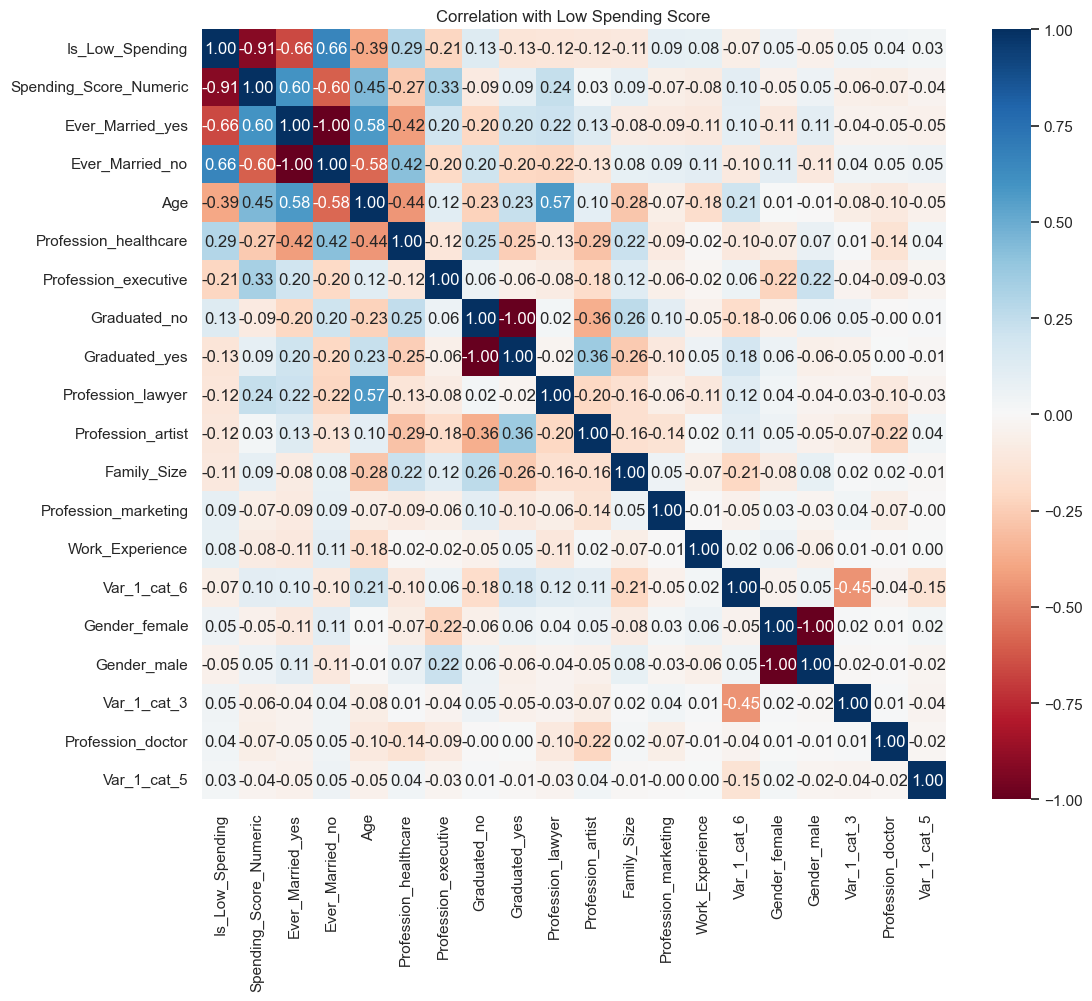

Top factors driving Low Spending:
Is_Low_Spending          1.000000
Ever_Married_no          0.657873
Profession_healthcare    0.293357
Graduated_no             0.127721
Profession_marketing     0.089442
Work_Experience          0.084086
Gender_female            0.049267
Var_1_cat_3              0.045499
Profession_doctor        0.036532
Var_1_cat_5              0.029115
Name: Is_Low_Spending, dtype: float64


In [58]:




# turning the text into numbers.
spending_map = {'low': 1, 'average': 2, 'high': 3}

# Create an ordinal column (1, 2, 3) useful for seeing the "trend" of spending
df_clean_tes['Spending_Score_Numeric'] = df_clean_tes['Spending_Score'].map(spending_map)

# Create the specific binary target (0 or 1) for your specific question "Is Spending Low?"
df_clean_tes['Is_Low_Spending'] = (df_clean_tes['Spending_Score'] == 'low').astype(int)

# Handle Other Categorical Data (One-Hot Encoding)
# We convert nominal columns (Gender, Job, etc.) into numeric 0/1 columns
# We EXCLUDE 'Spending_Score' from this list because we handled it manually above
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']

# pd.get_dummies will turn the categorical columns into numbers and remove the original text columns
df_encoded = pd.get_dummies(df_clean_tes, columns=categorical_cols)

# Calculate Correlation
# We use numeric_only=True to ensure it ignores any remaining text columns (like 'Segmentation' or ID)
# instead of crashing.
correlation_matrix = df_encoded.corr(numeric_only=True)

# Filter for our specific target: 'Is_Low_Spending'
target_correlation = correlation_matrix['Is_Low_Spending'].sort_values(ascending=False)


plt.figure(figsize=(12, 10))

# Select the top 20 factors that correlate with Low Spending
top_features = target_correlation.abs().sort_values(ascending=False).head(20).index

# Plot heatmap
sns.heatmap(df_encoded[top_features].corr(numeric_only=True), 
            annot=True, 
            cmap='RdBu', 
            fmt=".2f",
            vmin=-1, vmax=1) # Set limits to -1 and 1 for clearer colors

plt.title("Correlation with Low Spending Score")
plt.show()

# Print the top numerical drivers
print("Top factors driving Low Spending:")
print(target_correlation.head(10))

In [62]:


# --- 1. Load & Clean Data ---
# Safety Check: If you re-ran the code, 'Predicted_Segmentation' might exist in Test.
# We drop it to ensure a fresh start.
if 'Predicted_Segmentation' in df_clean_tes.columns:
    df_clean_tes = df_clean_tes.drop(columns=['Predicted_Segmentation'])

# --- 2. Prepare Target ---
target_col = 'Segmentation'
le = LabelEncoder()
y_train = le.fit_transform(df_clean_tra[target_col])

# --- 3. Align Features ---
df_clean_tra['is_train'] = 1
df_clean_tes['is_train'] = 0

train_features = df_clean_tra.drop(columns=[target_col])
test_features = df_clean_tes.copy()

combined_df = pd.concat([train_features, test_features], axis=0, ignore_index=True)

# --- 4. Feature Engineering ---
spending_map = {'low': 1, 'average': 2, 'high': 3}
combined_df['Spending_Score'] = combined_df['Spending_Score'].map(spending_map)

categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1']
combined_df_encoded = pd.get_dummies(combined_df, columns=categorical_cols)

# --- 5. Split Back ---
X_train = combined_df_encoded[combined_df_encoded['is_train'] == 1].drop(columns=['ID', 'is_train'])
X_test = combined_df_encoded[combined_df_encoded['is_train'] == 0].drop(columns=['ID', 'is_train'])

# --- 5.5. THE FIX: SAFETY FILTER ---
# This command keeps ONLY numbers. It effectively deletes any text column 
# (like 'Segmentation' or 'd') that caused the crash.
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# --- 6. Impute ---
# Now that we are sure only numbers exist, the median strategy will work.
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# --- 7. Model & Predict ---
clf = NearestCentroid()
clf.fit(X_train, y_train)

predictions_numeric = clf.predict(X_test)
predictions_labels = le.inverse_transform(predictions_numeric)

# --- 8. Save Results ---
df_clean_tes['Predicted_Segmentation'] = predictions_labels

print("Prediction complete!")
print(df_clean_tes[['ID', 'Predicted_Segmentation']].head())

Prediction complete!
       ID Predicted_Segmentation
0  458989                      d
1  458994                      d
3  459000                      c
4  459001                      d
5  459003                      b


/var/folders/g9/dfcxkg0952scvgx9_4_jm4fc0000gn/T/ipykernel_39927/375040154.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_tra['is_train'] = 1
/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Spending_Score_Numeric' 'Is_Low_Spending']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Spending_Score_Numeric' 'Is_Low_Spending']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


/var/folders/g9/dfcxkg0952scvgx9_4_jm4fc0000gn/T/ipykernel_39927/3107268943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions_labels, palette='viridis', order=['a', 'b', 'c', 'd'])


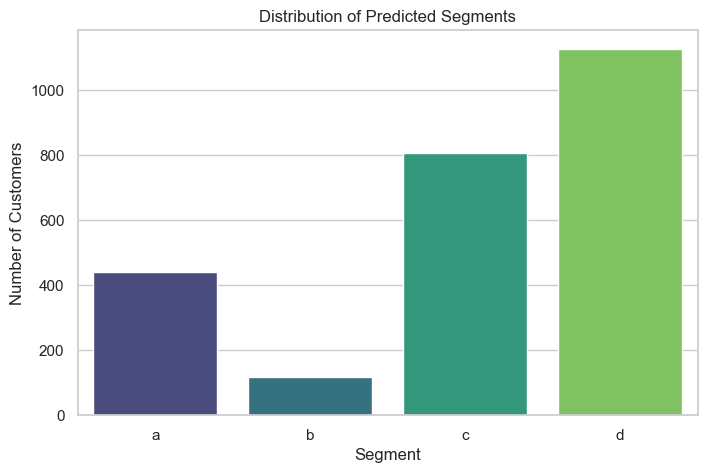

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [68]:
# Visualize the Predictions (Bar Chart) ---
plt.figure(figsize=(8, 5))
# Assuming 'predictions_labels' comes from the previous step
sns.countplot(x=predictions_labels, palette='viridis', order=['a', 'b', 'c', 'd'])
plt.title("Distribution of Predicted Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

# Visualize the "Why": Feature Importance (Centroids) ---
# Nearest Centroid works by calculating the average (mean) of each feature for each class.
# We can access these averages using `clf.centroids_`.

# Create a DataFrame of the Centroids
# clf.centroids_ has shape (4, n_features) -> (A,B,C,D rows, features columns)
centroids_df = pd.DataFrame(clf.centroids_, 
                            columns=X_train.columns, 
                            index=le.classes_) # Index = A, B, C, D

# TRANSPOSE for better readability (Features on Y-axis, Segments on X-axis)
centroids_df = centroids_df.T

# SCALE THE DATA FOR VISUALIZATION (Optional but recommended)
# Since 'Age' (0-80) is much bigger than 'Gender' (0-1), it will dominate the colors.
# We normalize row-by-row so we can compare "Relative High/Low" for each feature.
centroids_normalized = centroids_df.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(centroids_normalized, cmap='RdBu_r', center=0, annot=False)

plt.title("Feature Importance Heatmap (Standardized Centroids)")
plt.xlabel("Predicted Segment")
plt.ylabel("Feature")
plt.show()

/var/folders/g9/dfcxkg0952scvgx9_4_jm4fc0000gn/T/ipykernel_39927/1979996023.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Predicted_Segmentation',


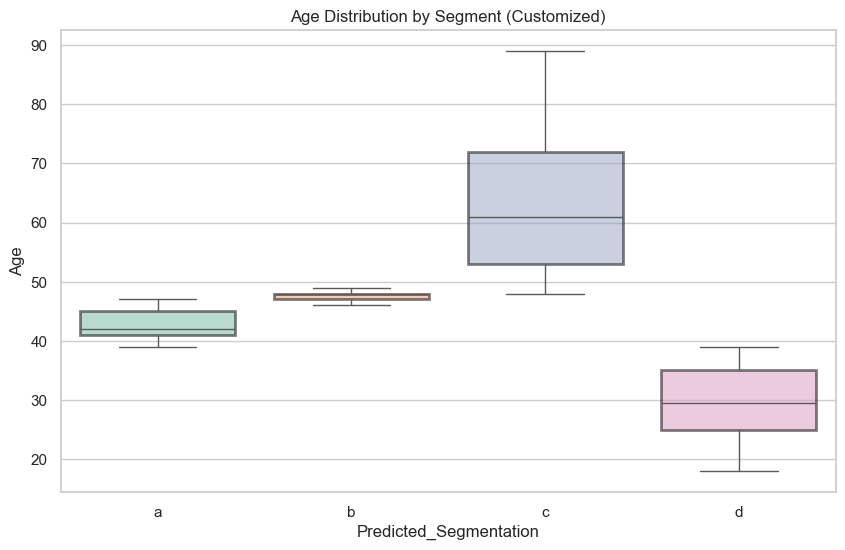

In [70]:

# Define the custom properties FIRST
# 'facecolor': 'none' makes the box transparent
# 'edgecolor': 'blue' makes the outline blue
my_box_props = {'alpha': 0.5, 'edgecolor': 'black', 'linewidth': 2}

plt.figure(figsize=(10, 6))

# Pass it to the plot
sns.boxplot(x='Predicted_Segmentation', 
            y='Age', 
            data=df_clean_tes, 
            order=['a', 'b', 'c', 'd'], 
            palette="Set2",
            boxprops=my_box_props) # <--- Now this works because my_box_props exists

plt.title('Age Distribution by Segment (Customized)')
plt.show()

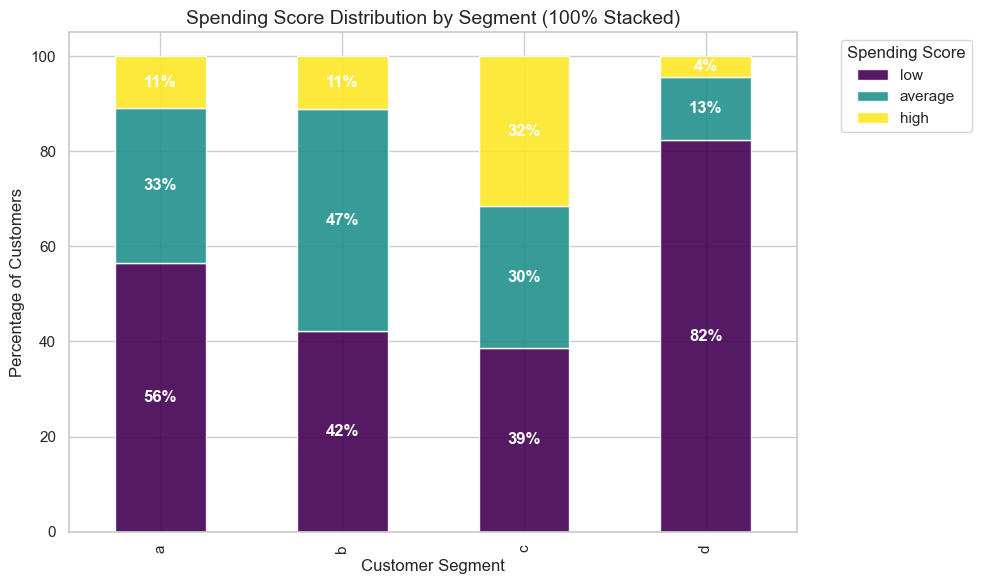

In [72]:

# Create a Cross-Tabulation (Count of Segment vs Spending)
# normalize='index' turns counts into percentages (so rows sum to 100%)
cross_tab = pd.crosstab(df_clean_tes['Predicted_Segmentation'], 
                        df_clean_tes['Spending_Score'], 
                        normalize='index') * 100

# Reorder for logical flow (Low -> Average -> High)
cross_tab = cross_tab[['low', 'average', 'high']]

# Plot
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', alpha=0.9)

# Add Labels
plt.title('Spending Score Distribution by Segment (100% Stacked)', fontsize=14)
plt.ylabel('Percentage of Customers')
plt.xlabel('Customer Segment')
plt.legend(title='Spending Score', bbox_to_anchor=(1.05, 1), loc='upper left')

for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', label_type='center', color='white', weight='bold')

plt.tight_layout()
plt.show()

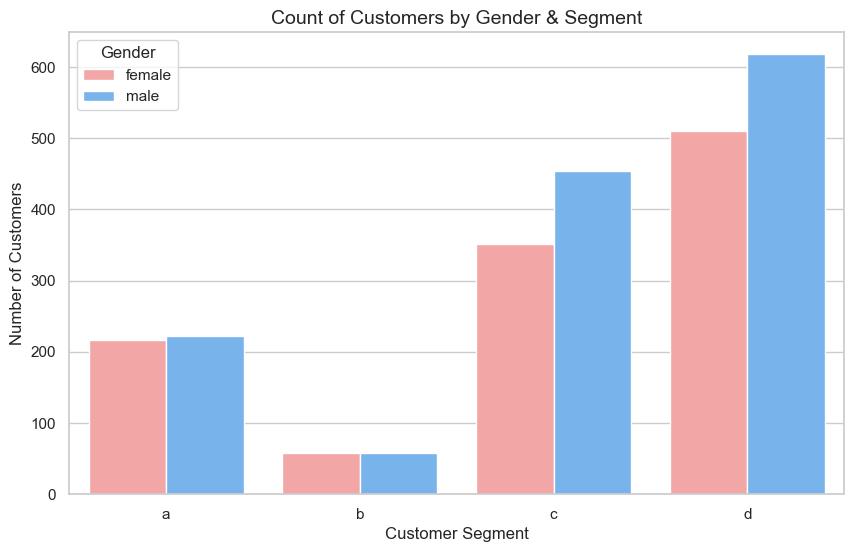

In [74]:
plt.figure(figsize=(10, 6))

# Hue separates the bars by Gender
sns.countplot(x='Predicted_Segmentation', 
              hue='Gender', 
              data=df_clean_tes, 
              order=['a', 'b', 'c', 'd'], 
              palette=['#ff9999', '#66b3ff'])

plt.title('Count of Customers by Gender & Segment', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.show()

/var/folders/g9/dfcxkg0952scvgx9_4_jm4fc0000gn/T/ipykernel_39927/1987844189.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted_Segmentation',


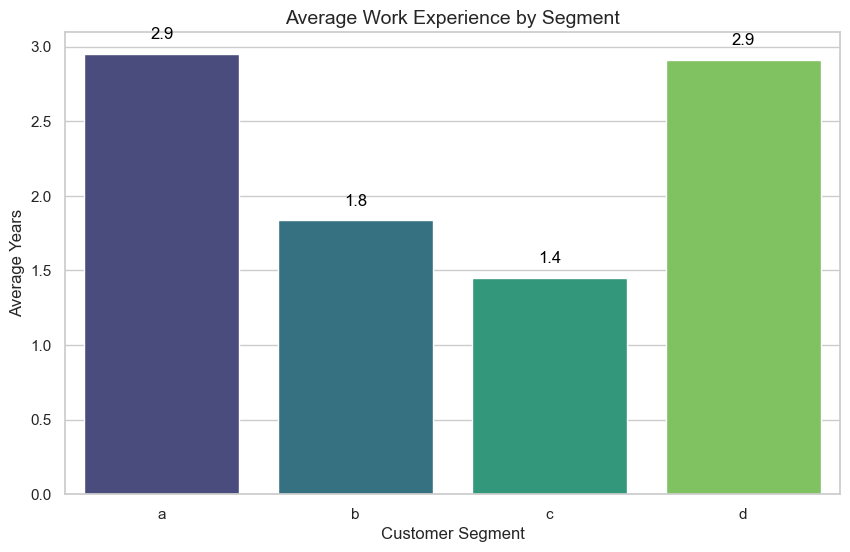

In [76]:
# Calculate Average
avg_exp = df_clean_tes.groupby('Predicted_Segmentation')['Work_Experience'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted_Segmentation', 
            y='Work_Experience', 
            data=avg_exp, 
            order=['a', 'b', 'c', 'd'], 
            palette="viridis")

plt.title('Average Work Experience by Segment', fontsize=14)
plt.ylabel('Average Years')
plt.xlabel('Customer Segment')

# Add number labels on top
for index, row in avg_exp.iterrows():
    plt.text(row.name, row.Work_Experience + 0.1, f'{row.Work_Experience:.1f}', ha='center', color='black')

plt.show()

/var/folders/g9/dfcxkg0952scvgx9_4_jm4fc0000gn/T/ipykernel_39927/1156230967.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted_Segmentation',


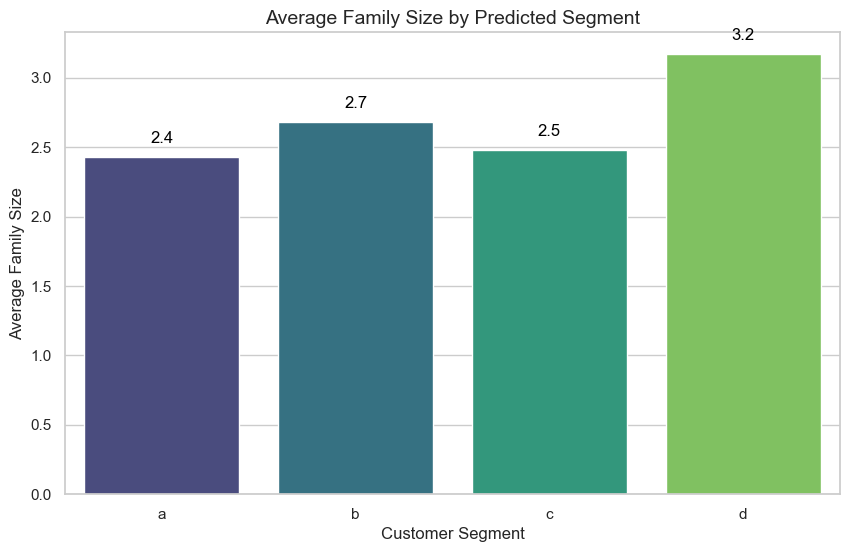

In [78]:
# Calculate Average Family Size per Segment
avg_family = df_clean_tes.groupby('Predicted_Segmentation')['Family_Size'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted_Segmentation', 
            y='Family_Size', 
            data=avg_family, 
            order=['a', 'b', 'c', 'd'], 
            palette="viridis")

plt.title('Average Family Size by Predicted Segment', fontsize=14)
plt.ylabel('Average Family Size')
plt.xlabel('Customer Segment')

# Add the number labels on top of the bars
for index, row in avg_family.iterrows():
    # Check for NaN just in case a segment is empty
    if pd.notnull(row.Family_Size):
        plt.text(index, row.Family_Size + 0.1, f'{row.Family_Size:.1f}', ha='center', color='black')

plt.show()

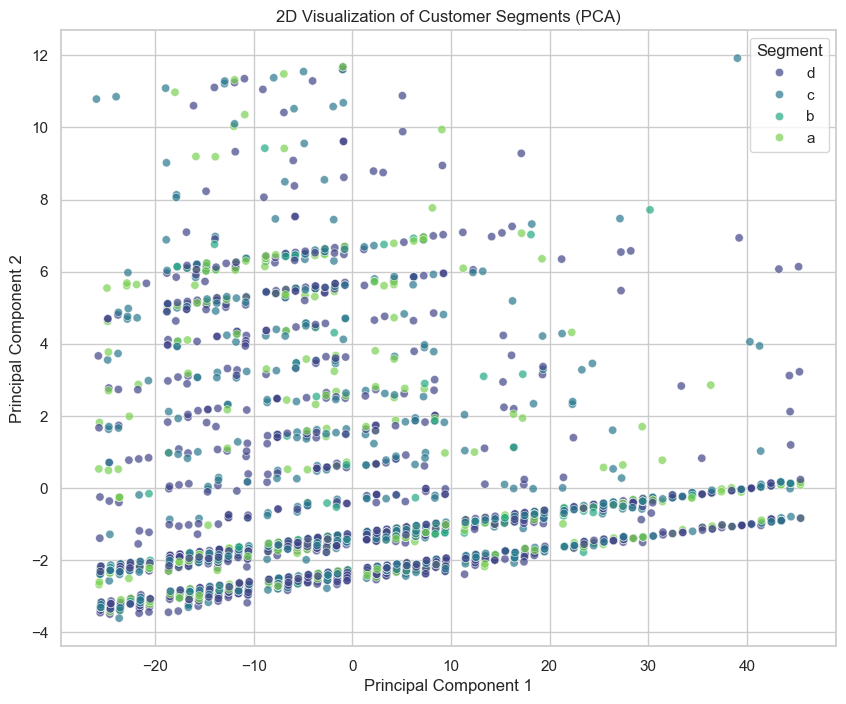

In [80]:
# Prepare Data
# We use 'X_test' because in the previous step, we already filled its missing values (imputed)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_test)  # <--- CHANGED THIS NAME

# 2. Create a DataFrame for Plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Segment'] = df_clean_tes['Predicted_Segmentation'] # Use the predictions we just made

# 3. Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Segment', data=pca_df, palette='viridis', alpha=0.7)
plt.title('2D Visualization of Customer Segments (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()